<a href="https://colab.research.google.com/github/vijaysae-Ai/outliers/blob/main/removie_outlier_using_Z_score_and_IQR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [5]:
df=pd.read_csv('weight-height.xls')

In [7]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<Axes: xlabel='Height', ylabel='Count'>

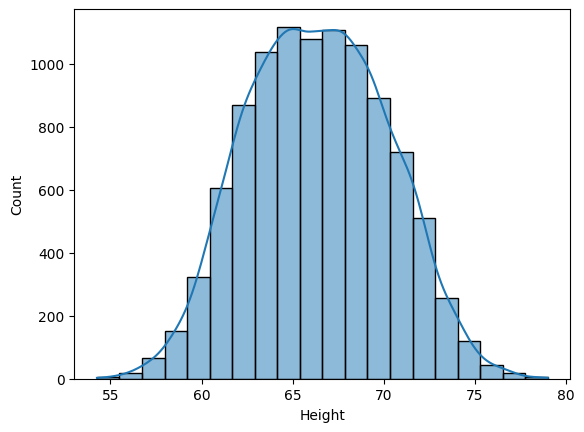

In [20]:
#plot the distribution
sns.histplot(df.Height,bins=20,kde =True)


<ipython-input-17-653d600abfe0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Height)


<Axes: xlabel='Height', ylabel='Density'>

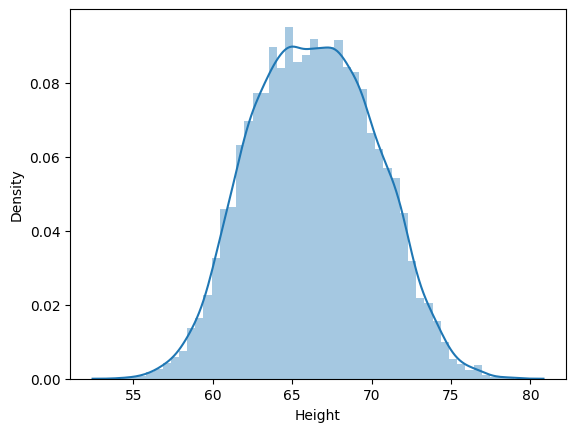

In [17]:
sns.distplot(df.Height,)

<Axes: >

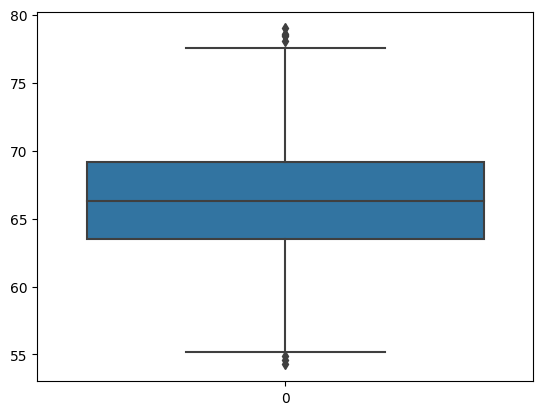

In [21]:
sns.boxplot(df['Height'])

<Axes: >

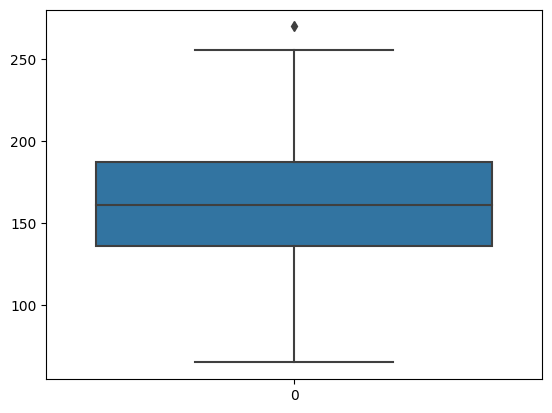

In [23]:
sns.boxplot(df['Weight'])

In [24]:
#3 standard deviaton
upper_limit=df.Height.mean() + 3 * df.Height.std()

In [28]:
upper_limit

77.91014411714093

anything 77.91 above we will remove

In [30]:
lower_limit=df.Height.mean() - 3 * df.Height.std()

In [31]:
lower_limit

54.82497539250156

In [36]:
df[(df.Height>upper_limit)|(df.Height<lower_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [37]:
data=df[(df.Height>lower_limit)&(df.Height<upper_limit)]

In [38]:
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [43]:
#we can use the another way using Z score
df['Zscore_value']=(df.Height-df.Height.mean())/df.Height.std()

In [45]:
df.head()

,Gender,Height,Weight,Zscore_value
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [49]:
df.Zscore_value[(df.Zscore_value >-3) & (df.Zscore_value<3)].shape

(9993,)